<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML6_gmnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6.	Using Gaussian and Multinomial Naive Bayes algorithms, predict if a person is diabetic or not, based on the features provided. Find accuracy and F1-Scores of both algorithms.
Dataset: pima-indians-diabetes.data.csv


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# data=pd.read_csv('pima-indians-diabetes.csv')
data=pd.read_csv('diabetes.csv')
raw = data.copy()
data.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
headers = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
# data = pd.read_csv('pima-indians-diabetes.csv', names=headers)
data = pd.read_csv('diabetes.csv', names=headers)

In [ ]:
data.head()
data.describe()

,preg,plas,pres,skin,insu,bmi,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data=data.drop_duplicates()
feature_df=data[data.columns[0:-1]]

In [ ]:
x=np.asarray(feature_df)
y=np.asarray(data[data.columns[-1]])
x1 = preprocessing.normalize(x, axis=0)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=16)

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insu'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

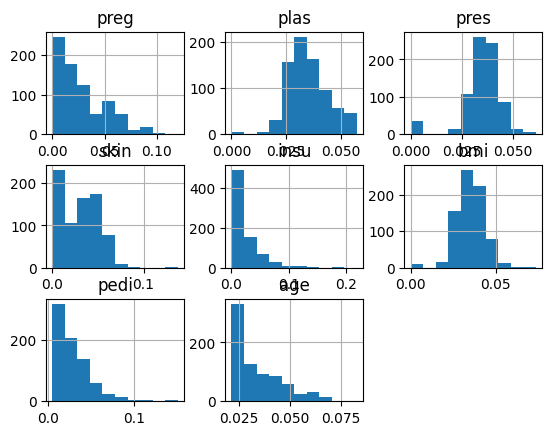

In [ ]:
pd.DataFrame(data=x1, columns=headers[:-1]).hist()

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_f1 = f1_score(y_test, y_pred)
print("Gaussian Naive Bayes:")
print("Accuracy:", round(gnb_accuracy*100, 2))
print("F1-score:", round(gnb_f1*100, 2))

Gaussian Naive Bayes:
Accuracy: 82.47
F1-score: 72.16


In [ ]:
mnb = MultinomialNB()
y_pred_mnb = mnb.fit(x_train, y_train).predict(x_test)
mnb_accuracy = accuracy_score(y_test, y_pred_mnb)
mnb_f1 = f1_score(y_test, y_pred)
print("Multinomial Naive Bayes:")
print("Accuracy:", round(mnb_accuracy*100, 2))
print("F1-score:", round(mnb_f1*100, 2))

Multinomial Naive Bayes:
Accuracy: 66.23
F1-score: 72.16
